# Housing in Brazil

In this project, I worked with a dataset of homes for sale in Brazil. My goal is to determine if there are regional differences in the real estate market.

Also, I looked at southern Brazil to see if there is a relationship between home size and price.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly as px

## Data Preparation and Import

There are two CSV files containing real estate data from Brazil. I will import them and clean them one by one

In [2]:
# Import and inspect the first csv
df1 = pd.read_csv('brasil-real-estate-1.csv')
display(df1.head())
display(df1.info())

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


None

There are null values in the lat-lon column. I will check how many they are, if they are not much, I will drop them.

In [3]:
# Checking number of nulls for each column
df1.isnull().sum()

property_type                 0
place_with_parent_names       0
region                        0
lat-lon                    1283
area_m2                       0
price_usd                     0
dtype: int64

The number of nulls are small compared to the amount of records in the dataset. I will proceed with dropping them. 

In [4]:
# Drop all rows with nulls from df1
df1.dropna(inplace=True)

The lat-lon column contains the latitudes and longitudes of each property, seperated by a comma. I will create 2 seperate columns that will hold the latitude and longitude each and convert them to float data type.

In [5]:
# Split the lat-lon column by comma and convert to float
df1[['lat', 'lon']] = df1['lat-lon'].str.split(',', expand=True).astype(float)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
dtypes: float64(3), object(5)
memory usage: 812.2+ KB


The `place_with_parent_names` contains the hierarchy of the location each property in the following order: Country, State, City. I will create a `state` column by by extract the state names from the hierarchy.

In [7]:
# Extracting state names
df1['state'] = df1['place_with_parent_names'].str.split('|', expand=True)[2]

The data type of the `price_usd` column is string instead of float. I will convert it to float after removing the dollar sign and comma.

In [8]:
# Remove dollar sign and comma and convert to float
df1['price_usd'] = (
    df1['price_usd'].str.replace('$', '', regex=False)
    .str.replace(',', '')
    .astype(float)
)

Now that I'm done cleaning the data, I will drop the unnecessary columns: `lat-lon` and `place_with_parent_names`

In [9]:
# Drop lat-lon and place_with_parent_names columns
df1.drop(columns = ['lat-lon', 'place_with_parent_names'], inplace=True)

Now that I'm done cleaning the first data set, I will import and clean the second dataset.

In [10]:
# Import and inspect the second dataset
df2 = pd.read_csv('brasil-real-estate-2.csv')
display(df2.head())
display(df2.info())

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


None

This dataset has `price_brl` instead of `price_usd`. I will create `price_usd` column. (Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)

In [11]:
# Create `price_usd` by converting `price_brl` to usd
df2['price_usd'] = df2['price_brl'] / 3.19

There are some nulls in the dataset. I will drop the `price_brl` column along with thse nulls

In [12]:
# Drop `price_brl` column 
df2.drop(columns = ['price_brl'], inplace=True)

# Drop nulls in the dataset 
df2.dropna(inplace=True)

Now that I've cleaned both datasets, i will combine them into a single dataframe

In [13]:
# Concatenate both dataframes
df = pd.concat([df1, df2])

## Exploratory Data Analysis

I will use the `.describe()` method to view summary statistics for the `area_m2` and `price_usd` columns.

In [14]:
df[['area_m2', 'price_usd']].describe()

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


I will create a histogram of `price_usd` to visualize its distribution.

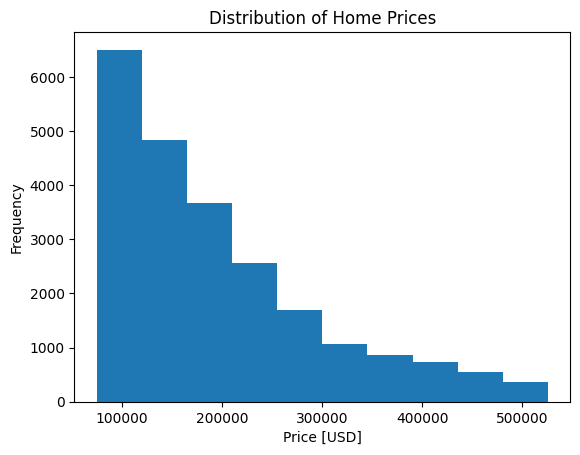

In [15]:
# Build histogram
plt.hist(df['price_usd'])


# Label axes
plt.xlabel('Price [USD]')
plt.ylabel('Frequency')
# Add title
plt.title('Distribution of Home Prices');

Price is rightly-skewed as indicated in the summary statistics, where the mean is greater than the median.

I will visualize the distribution of area with a boxplot.

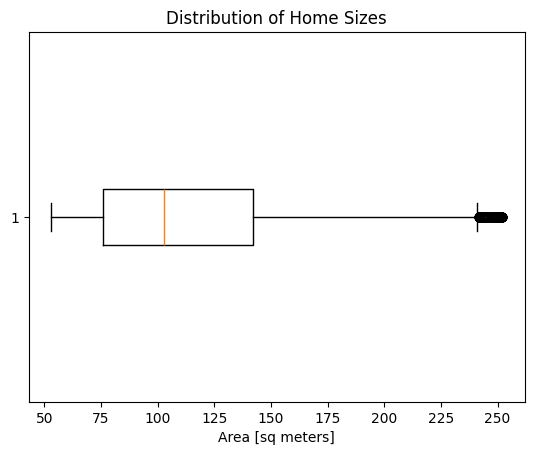

In [16]:
# Build box plot
plt.boxplot(df['area_m2'], vert=False)


# Label x-axis
plt.xlabel('Area [sq meters]')

# Add title
plt.title('Distribution of Home Sizes');

I will calculate the mean price grouped by region, sorted in ascending order of mean price and visualize in a bar chart.

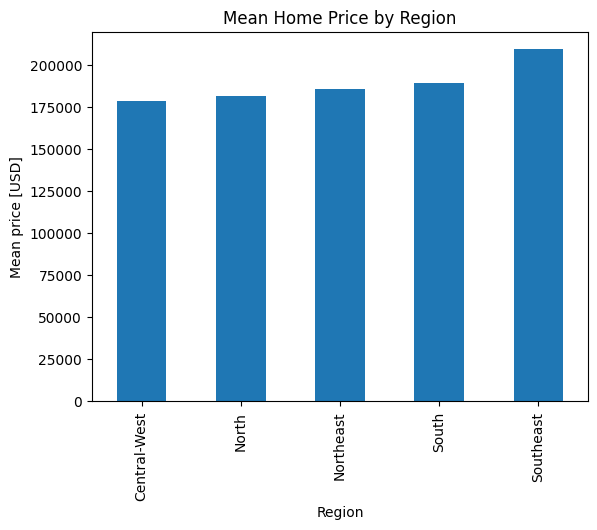

In [19]:
df.groupby('region')['price_usd']\
.mean()\
.sort_values()\
.plot(
    kind='bar',
    xlabel='Region',
    ylabel='Mean price [USD]',
    title='Mean Home Price by Region'
);

Houses in the Southeast and the South had the highest average price

I will now look into the relationship between home size and price in the southern region of Brazil.


I will create a dataframe `df_south` that contains all homes in the region `South`.

In [21]:
df_south = df[df['region'] == 'South']

Using the `value_counts()` method, I will create a series that contains the number of properties in each state in the south.

In [22]:
homes_by_state = df_south['state'].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

I will create a scatterplot visualizing the relationship between price and area for the state in the south that has the largest number of properties.

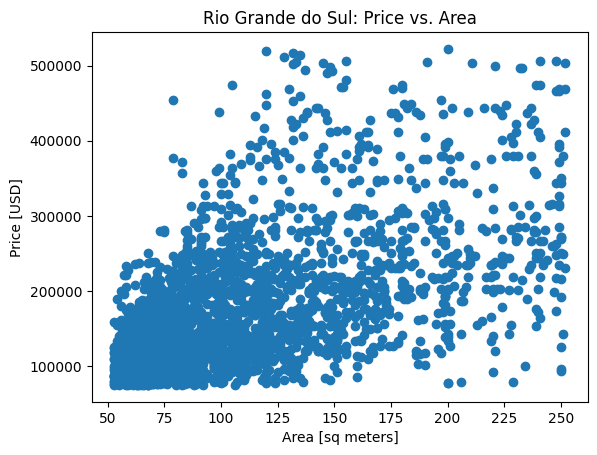

In [23]:
# Subset data
df_south_rgs = df_south[df_south['state'] == 'Rio Grande do Sul']

# Build scatter plot
plt.scatter(x=df_south_rgs['area_m2'],
           y=df_south_rgs['price_usd'])


# Label axes
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')

# Add title
plt.title("Rio Grande do Sul: Price vs. Area");

Properties and Area in the Rio Grande so Sul are slightly positively correlated.

I will create a dictionary `south_states_corr`, where the key names are the 3 states in the South, and their associated calues are the correlation coefficient between area and price in the respective state.

In [24]:
south_states = list(df_south.state.unique())
south_states_corr = {}

for state in south_states:
    state_data = df_south[df_south['state'] == state]
    corr = state_data['area_m2'].corr(state_data['price_usd'])
    south_states_corr[state] = corr

south_states_corr

{'Paraná': np.float64(0.5436659935502659),
 'Rio Grande do Sul': np.float64(0.5773267433717683),
 'Santa Catarina': np.float64(0.5068121776366781)}

Price and area are slightly positively correlated in each state in the southern region of Brazil.